# Week 4 example
The goal of this exercise is to read a netCDF file for World Ocean Atlas (WOA)
- WOA is a gridded dataset derived form historical ocean observations
- It is available from [NCEI website](https://www.ncei.noaa.gov/data/oceans/woa/WOA18/DATA/) 
- https://www.ncei.noaa.gov/data/oceans/woa/WOA18/DATA/

In [48]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [49]:
# The location of the file needs to be adjusted
d=nc.Dataset('/Users/takamitsu3/Downloads/woa18_decav_t00_01.nc')
print(d.variables.keys())

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


In [50]:
# read in data
y = d['lat'][:]
x = d['lon'][:]
T = d['t_an'][:]

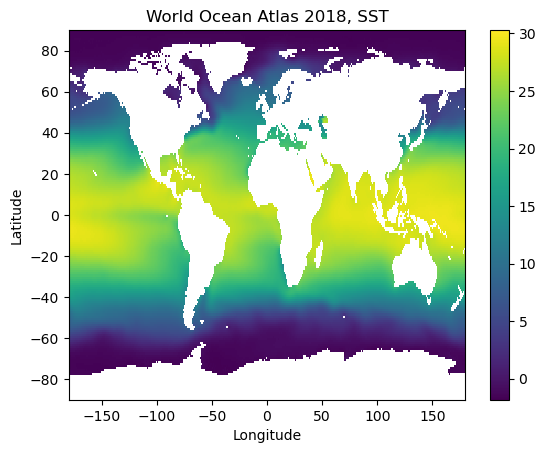

In [53]:
# make annual mean SST plot
plt.pcolormesh(x,y,T[0,0,:,:])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('World Ocean Atlas 2018, SST')
plt.colorbar()
plt.show()

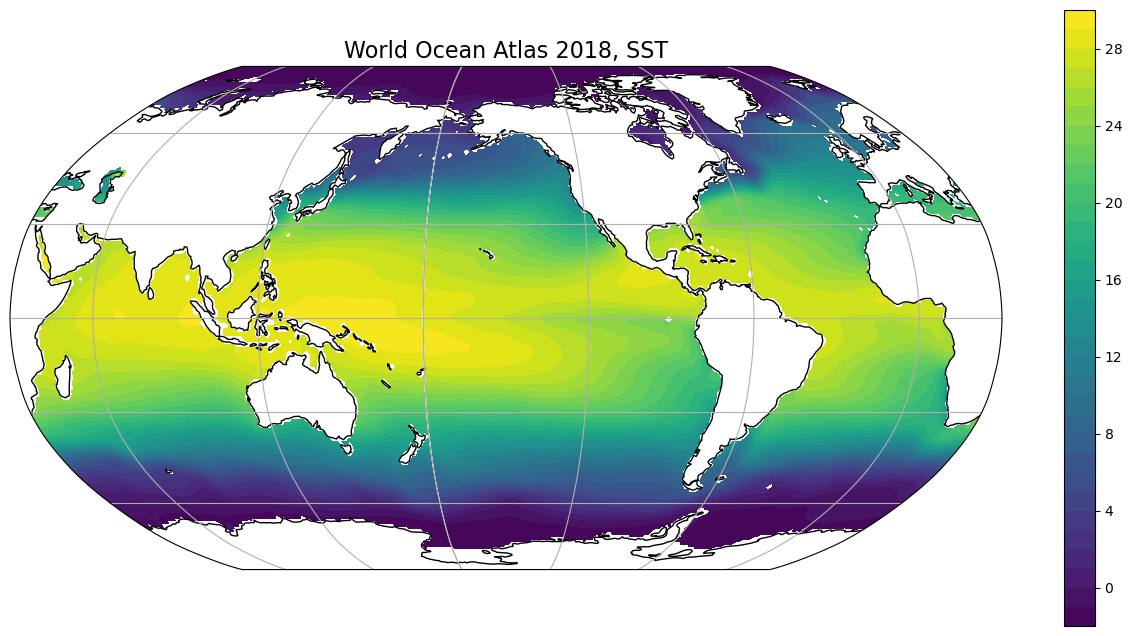

In [57]:
# a nicer plot Robinson projection
plt.figure(figsize=(16,8))
ax1 = plt.subplot(111, projection=ccrs.Robinson(central_longitude=-150))
ax1.set_global()

# plot contourf as defined in lon x lat coordinate
ct=np.arange(-2,31,1)
c=ax1.contourf(x,y,T[0,0,:,:],ct,transform=ccrs.PlateCarree())

# show grid line
ax1.gridlines()
plt.title('World Ocean Atlas 2018, SST',fontsize=16)
plt.colorbar(c)
ax1.coastlines('110m', alpha=1)
plt.show()

In [70]:
# select 30W
temp = np.argwhere(x>=-30)
xindex=temp[0]
z = d['depth'][:]

Text(0.5, 0, 'lontitude')

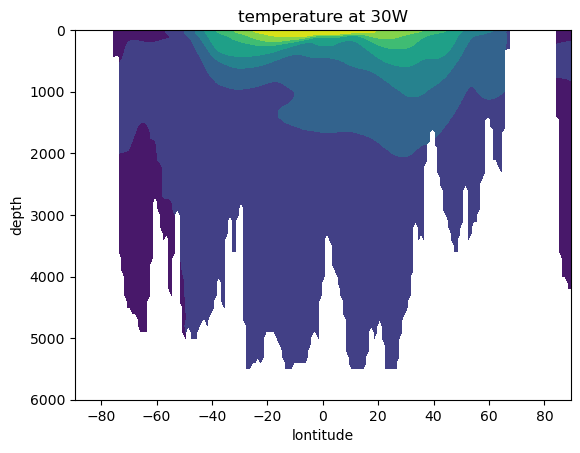

In [75]:
# generate contour plot
Tyz = np.squeeze(T[0,:,:,xindex])
plt.contourf(y,z,Tyz)
plt.ylim(6000,0)
plt.title('temperature at 30W')
plt.ylabel('depth')
plt.xlabel('lontitude')

masked_array(data=[0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01,
                   2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
                   5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01, 7.00e+01,
                   7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01,
                   1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02,
                   2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
                   3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
                   4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02,
                   7.00e+02, 7.50e+02, 8.00e+02, 8.50e+02, 9.00e+02,
                   9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03, 1.15e+03,
                   1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03,
                   1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
                   1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03,
                   1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
                   2.40e+03, 2.50e